# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd

billboard_data = pd.read_csv('/Users/gregorymaclennan/source_files/billboard.csv')
print billboard_data.head(5) # check the data out
print billboard_data.columns # get a list of all the columns
print billboard_data.dtypes # check the data types of all the columns
# Note that the dates are object types and the x.1st week is type int

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week     ...      \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0     ...       
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0     ...       
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0     ...       
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0     ...       
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0     ...       

   x67th.week  x68th.week  x69th.week  x70th.week 

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The billboard.csv file contains a list of 317 songs that appeared on the billboard top 100 list in the year 2000. We have 76 weeks of data on each track, with information on when the track first entered the list and when the track peaked. It appears that some of the data from the last columns have numerous NaN values, so it will be interesting to see if there is any data in those columns at all. As noted above the 1st week column is of type int and the date columns are of type object. 

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, check for missing values (and replace them if it makes sense to do so). Explain your rationale for the way you choose to "impute" the missing data.

In [6]:
# takes the date.entered and date.peaked column and converts the strings to datetime format
billboard_data['date.entered'] = pd.to_datetime(billboard_data['date.entered']) 
billboard_data['date.peaked'] = pd.to_datetime(billboard_data['date.peaked'])
# convert the x1st.week column from int to float
billboard_data['x1st.week'] = billboard_data['x1st.week'].astype(float)
# print billboard_data.dtypes # confirm both columns were changed properly
billboard_data = billboard_data.dropna(axis=1,how='all') # if ALL values in any of the columns are NaN then we will drop the column.
# That way we can drop any columns that have no data at all in them.
print billboard_data.dtypes

year                        int64
artist.inverted            object
track                      object
time                       object
genre                      object
date.entered       datetime64[ns]
date.peaked        datetime64[ns]
x1st.week                 float64
x2nd.week                 float64
x3rd.week                 float64
x4th.week                 float64
x5th.week                 float64
x6th.week                 float64
x7th.week                 float64
x8th.week                 float64
x9th.week                 float64
x10th.week                float64
x11th.week                float64
x12th.week                float64
x13th.week                float64
x14th.week                float64
x15th.week                float64
x16th.week                float64
x17th.week                float64
x18th.week                float64
x19th.week                float64
x20th.week                float64
x21st.week                float64
x22nd.week                float64
x23rd.week    

In [33]:
# Export cleaned data for use in Tabeleau
billboard_data.to_csv('/Users/gregorymaclennan/source_files/billboard_data_cleaned.csv')

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [21]:
# select the 7 id columns which we want to keep in place
id_columns = ['year','artist.inverted','track','time','genre','date.entered','date.peaked']

# use the melt function to pivot the weekly ranking data and label the columns appropriately
billboard_data_melt = pd.melt(billboard_data,id_vars=id_columns,var_name='week',value_name='ranking')
print billboard_data_melt.head(5) # confirm the transformation

# export the melt df to tableau
billboard_data_melt.to_csv('/Users/gregorymaclennan/source_files/billboard_data_melt_cleaned.csv')

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked       week  ranking  
0  Rock   2000-09-23  2000-11-18  x1st.week     78.0  
1  Rock   2000-02-12  2000-04-08  x1st.week     15.0  
2  Rock   1999-10-23  2000-01-29  x1st.week     71.0  
3  Rock   2000-08-12  2000-09-16  x1st.week     41.0  
4  Rock   2000-08-05  2000-10-14  x1st.week     57.0  


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

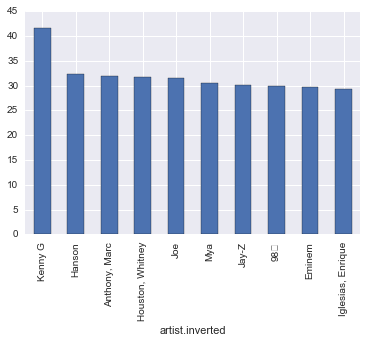

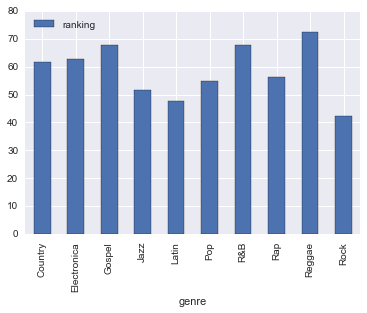

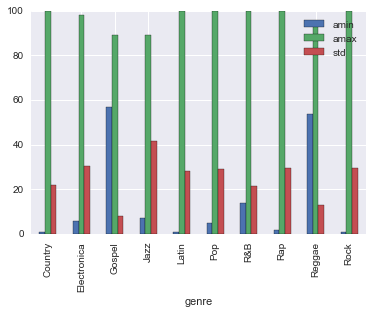

In [131]:
genre_mean_ranking = billboard_data_melt.pivot_table(index='genre')
genre_min_ranking = billboard_data_melt.pivot_table(index='genre', aggfunc=(np.min,np.max,np.std))
genre_count_ranking = billboard_data_melt.pivot_table(index='genre')
# print genre_mean_ranking

most_volatile_artists = billboard_data_melt.pivot_table(index='artist.inverted', values='ranking', aggfunc=np.std).sort_values(ascending=False).head(10)
most_volatile_artists.plot(kind='bar',y='ranking')
plt.show()

genre_mean_ranking.plot(kind='bar',y='ranking')
plt.show()

genre_min_ranking.plot(kind='bar', y='ranking')
plt.show()

ranking         float64
time_to_peak    float64
year            float64
dtype: object


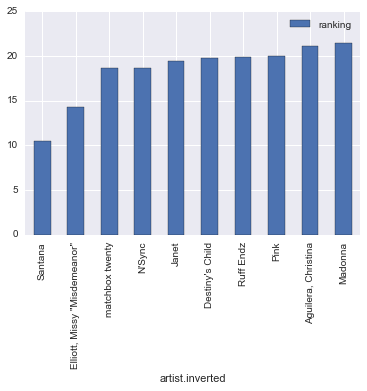

In [140]:
top_10_mean_ranking = pd.pivot_table(billboard_data_melt, index='artist.inverted',aggfunc=np.mean).sort_values('ranking').head(10)
print top_10_mean_ranking.dtypes #*discovered that there is no artist.inverted

top_10_mean_ranking.plot(kind='bar',y='ranking')
plt.show()


int64
   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  \
0  Rock   2000-09-23  2000-11-18       78.0       63.0       49.0   
1  Rock   2000-02-12  2000-04-08       15.0        8.0        6.0   
2  Rock   1999-10-23  2000-01-29       71.0       48.0       43.0   
3  Rock   2000-08-12  2000-09-16       41.0       23.0       18.0   
4  Rock   2000-08-05  2000-10-14       57.0       47.0       45.0   

       ...       x58th.week  x59th.week  x60th.week  x61st.week  x62nd.week  \
0      ...              NaN         N

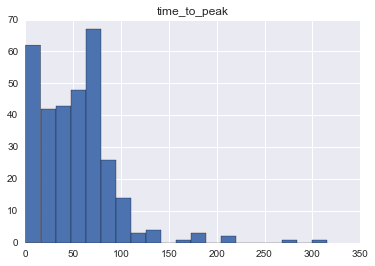

In [136]:
# create a time to peak column in the dataframe.
billboard_data['days_to_peak'] = abs(billboard_data['date.entered']-billboard_data['date.peaked']).dt.days
print billboard_data['days_to_peak'].dtype
print billboard_data.head(5)
print billboard_data.hist(column='time_to_peak', bins=20)
plt.savefig('/Users/gregorymaclennan/source_files/days_to_peak.png')

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

What genre of music should I choose if I want to write a song that will stay in the top 25 for as long as possible? 

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

* Read in CSV data to a Pandas DataFrame
* Clean the CSV data
    * Modify the data types for the appropriate columns
    * Remove the columns where all the values are null
* Create a new dataframe where we pivot the numerical values to a new column and keep the id values as is using the melt function
* Create a pivot table that indexes on the genre column and look at the mean rank by genre
* Export Data into Tableau
* Pull together a visual representation of the average number of weeks a song stays in the top 25 by genre

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

'https://gmaclenn.github.io/projects/2016/12/09/Billboard.html'

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 